# Ⅳ - 1 시각화 라이브러리, seaborn 

## 2. seaborn Essentials

In [3]:
import seaborn as sns 

<AxesSubplot:>

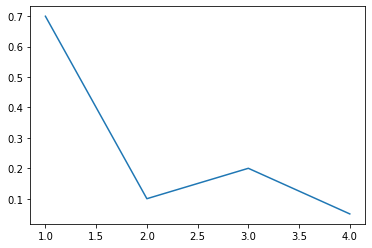

In [4]:
x = [1,3,2,4]
y = [0.7, 0.2, 0.1, 0.05]
sns.lineplot(x =[1,3,2,4], y = [0.7, 0.2, 0.1, 0.05] )

## 3. 막대그래프
- 범주형 데이터의 값과 그 값의 크기를 직사각형으로 나타낸 그림

/Users/KBS/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

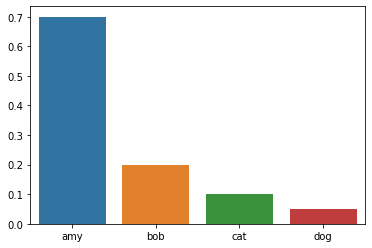

In [6]:
x = ["amy","bob","cat","dog"]
y =[0.7, 0.2, 0.1, 0.05]
sns.barplot(x,y)

## 4. plot의 속성

- seaborn은 파이썬의 시각화 라이브러리 matplotlib을 기반으로 만들어졌기 때문에, 
- matplotlib.pyplot의 속성을 변경해서 그래프에 다양한 요소를 변경/추가할 수 있다.


plt.tilte : 그래프의 제목을 추가한다.

plt._label() : 그래프의 축에 설명을 추가한다.  

plt.lim() : 그래프의 축의 범위를 지정한다.

plt.figure(figuresize = (x,y)) : 그래프의 크기를 지정한다.

In [7]:
import matplotlib.pyplot as plt

/Users/KBS/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

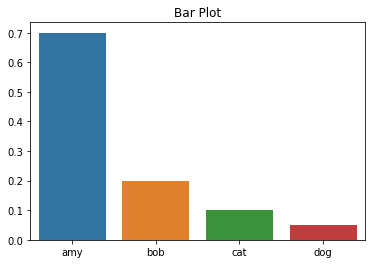

In [9]:
x = ["amy","bob","cat","dog"]
y =[0.7, 0.2, 0.1, 0.05]
sns.barplot(x,y)
plt.title("Bar Plot")
plt.show

### -plt._label() : 그래프의 축에 설명을 추가한다.  


/Users/KBS/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

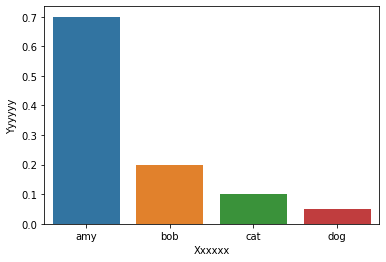

In [11]:
x = ["amy","bob","cat","dog"]
y =[0.7, 0.2, 0.1, 0.05]
sns.barplot(x,y)
plt.xlabel("Xxxxxx")
plt.ylabel("Yyyyyy")
plt.show

### -plt.lim() : 그래프의 축의 범위를 지정한다.


/Users/KBS/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


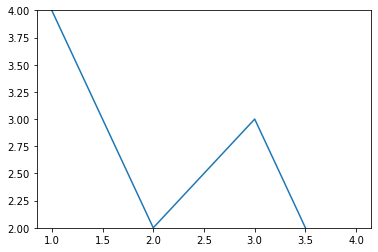

In [20]:
x = [1,3,2,4]
y = [4,3,2,1]

sns.lineplot(x,y)

plt.ylim(2,4)

plt.show()


### -plt.figure(figuresize = (x,y)) : 그래프의 크기를 지정한다.

/Users/KBS/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


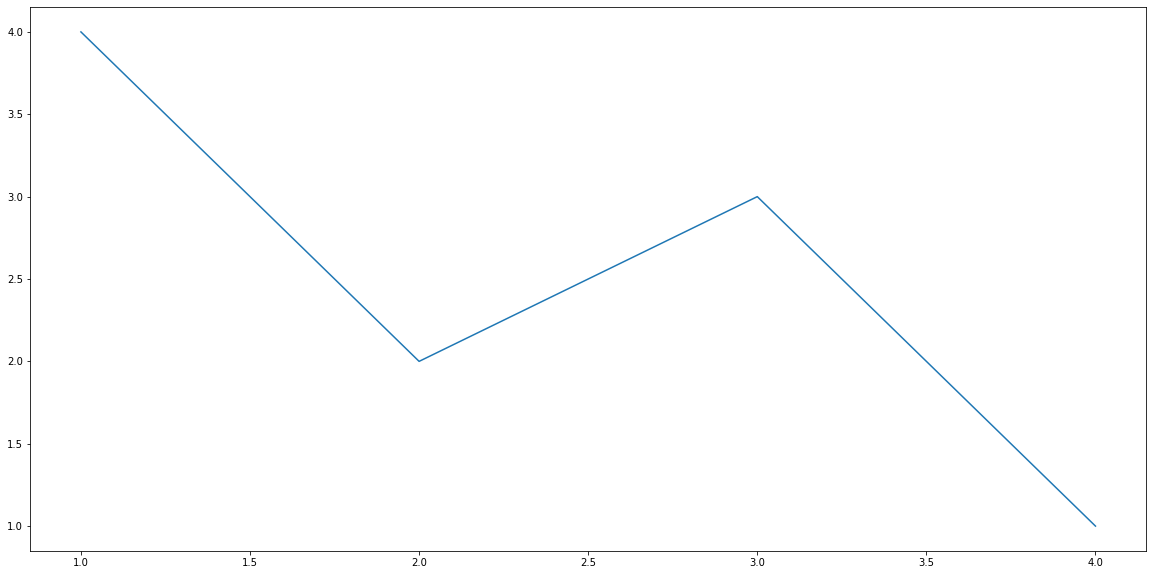

In [22]:
plt.figure(figsize = (10, 5)) ##figure를 먼저지정
x = [1,3,2,4]
y = [4,3,2,1]

sns.lineplot(x,y)

plt.show()

# Ⅳ - 2 스크래핑 결과 시각화하기 1 - 기상청 날씨 정보 조회

### ① 실습 목표 : 기상청 날씨 스크래핑하기

In [77]:
%pip install selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

Note: you may need to restart the kernel to use updated packages.


In [78]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.weather.go.kr/w/index.do")
driver.implicitly_wait(1)
temp = driver.find_element(By.ID, "my-tchart").text
# print(temp.split("\n")) # 역슬래쉬 기준으로 쪼개어 리스트 형태로 만듦
# print(temp.replace("℃","").split("\n")) : replace는 ℃, ""(빈칸)으로 바꿈
temp = [int(i) for i in temp.replace("℃","").split("\n")] # 자료형이 달라서 바꿔줘야함, 인자에 대해서 인티저타입으로 바궈줌, 리스트컴프리헨션
print(temp)



[35, 34, 33, 32, 31, 31, 30, 30, 29, 29, 28, 28, 27, 27, 27, 28, 29, 31]


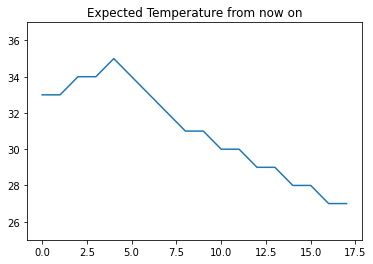

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.ylim(min(temp)-2, max(temp)+2)
plt.title("Expected Temperature from now on")

sns.lineplot(
    x = [i for i in range(len(temp))],
    y = temp
)

plt.show()

#ylim길게

# Ⅳ - 2 스크래핑 결과 시각화하기

### ① 실습 목표 : 해쉬코드 질문 태그의 빈도 확인

해쉬코드 사이트에는 다양한 질문이 올라 온다, 질문 제목 아래에 "태그"가 있다. 이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있다.

In [44]:
# user_agent필요
user_agent = {"user-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

In [53]:
%pip install Beautifulsoup4
%pip install requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [61]:
import requests
import time
from bs4 import BeautifulSoup

freq = {} #각 개수를 세기 위해 딕셔너리 만듦 뜻이다.

for i in range(1,11):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i),user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    # 1번 : ul태그 먼저찾기
    # 2번 : 1번 안에 있는 li태그의 text를 추출

    ul_tags = soup.find_all("ul","question-tags") #ul태그의 question-tags만 담기
    for ul in ul_tags:
        li_tags = ul.find_all("li")
        for li in li_tags:
            tag = li.text.strip()
            if tag not in freq:
                freq[tag] = 1
            else:
                freq[tag] += 1
    time.sleep(0.5)

print(freq)

{'java': 35, 'python': 244, 'crawling': 4, 'selenium': 12, 'algorithm': 3, 'list': 14, 'class': 5, 'private': 1, 'openpyxl': 3, 'html': 5, 'css': 5, 'c#': 4, 'web-crawling': 3, 'javascript': 11, 'python3': 3, 'selenium-webdrive': 2, 'random': 2, 'tuple': 2, 'pyinstaller': 2, 'mysql': 2, 'dataframe': 8, 'pandas': 13, 'function': 5, 'canvas': 1, 'fabric': 1, 'iterator': 1, 'c': 42, 'c++': 26, 'array': 9, 'advertisement': 1, 'node.js': 4, 'regression-analysis': 1, 'logistic-regression': 1, 'statsmodels': 1, 'oop': 1, 'program': 2, 'eclipse': 2, 'runtime-error': 1, 'dump': 1, 'flutter': 2, 'react': 2, 'webview': 1, 'error': 8, 'dev-c++': 1, 'dictionary': 5, 'qt': 2, 'qt-designer': 2, 'typescript': 2, 'environment-variables': 1, 'for': 10, 'preprocessor': 1, 'ai': 3, 'and': 1, 'tkinter': 4, 'socket': 2, 'loops': 5, 'header': 1, 'python3.6.1': 1, 'len': 1, 'linux': 6, 'python-2.7': 2, 'application': 1, 'idle': 1, 'pointer': 2, 'while-loop': 6, 'android-studio': 7, 'server': 2, 'connect': 1, 

In [64]:
# counter를 사용해 가장 빈도가 높은 value들을 추출하자.
from collections import Counter

counter = Counter(freq)

counter.most_common(10)

[('python', 244),
 ('c', 42),
 ('java', 35),
 ('c++', 26),
 ('list', 14),
 ('pandas', 13),
 ('selenium', 12),
 ('javascript', 11),
 ('for', 10),
 ('android', 10)]

In [65]:
#Seaborn을 이용해 이를 barplot으로 그리자
#그러나, 인덱스 0과 1의 리스트를 따로 만들어야한다.= 리스트컴프리헨션 활용하기

x = [elem[0] for elem in counter.most_common(10)]  ##elem[0] 리스트 요소의 0번째 추출
y = [elem[1] for elem in counter.most_common(10)]

<AxesSubplot:title={'center':'Frequncy of question'}, xlabel='Tag', ylabel='Frequency'>

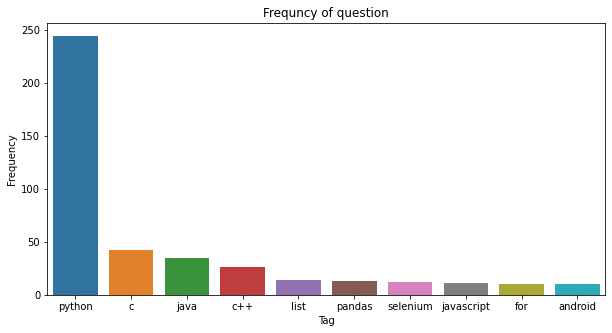

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("Frequncy of question")
plt.xlabel("Tag")
plt.ylabel("Frequency")

sns.barplot(x=x, y=y)

In [ ]:
#부하를 주지 않는...